**Instructions:**

**Instructions:**

Our clients have approached us to build a quick proof of concept before they request for funding of a project. They would like to eventually create an automated alert system that would identify potential anomalies in financial data.

Your task is to:

    -prepare, wrangle and clean the data
    -analyze patterns in the data 
    -(Optional) prepare model that will be able to detect anomalies

**Let's go!**

*Libraries*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm

*Import the data:*

In [2]:
data_2018 = pd.read_csv("C:/Users/AndreaArredondoRodri/Documents/AI-Exercise/ibm-ai-excercise/Data/Balance_sheet_data_2018.csv",dtype=str)

In [3]:
data_2019 = pd.read_csv("C:/Users/AndreaArredondoRodri/Documents/AI-Exercise/ibm-ai-excercise/Data/Balance_sheet_data_2019.csv",dtype=str)

In [4]:
data_2020 = pd.read_csv("C:/Users/AndreaArredondoRodri/Documents/AI-Exercise/ibm-ai-excercise/Data/Balance_sheet_data_2020.csv",dtype=str)

In [5]:
reference_table = pd.read_csv("C:/Users/AndreaArredondoRodri/Documents/AI-Exercise/ibm-ai-excercise/BU_reference_Table.csv",dtype=str)

In [6]:
country_table = pd.read_csv("C:/Users/AndreaArredondoRodri/Documents/AI-Exercise/ibm-ai-excercise/Country_table_definition.csv",dtype=str)

In [7]:
country_table_codes = country_table[["Code","Num Code"]].rename(columns = {"Num Code":"Country_Num"})
country_table.head(2)

,Unnamed: 0,Country name,Official state name,Code,Num Code,ISO 3166 Code
0,0,Afghanistan,The Islamic Republic of Afghanistan,AFG,004,ISO 3166-2:AF
1,2,Åland Islands,Åland,ALA,248,ISO 3166-2:AX


**Understain Data**

Total record per year:

In [8]:
print(len(data_2018),len(data_2019),len(data_2020))

20000070 20000070 20000070


*Note: For this first part of the understanding and analysis of the data, I have decided to do it with the dataframes divided year by year. Due to memory issues and the dimensions of the dataframes. In addition to pandas, there are other libraries to manipulate data such as Vaex or Dask, but for now I will not use them.*

*Type of data:*

In [9]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000070 entries, 0 to 20000069
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     object
 1   Country_Num    object
 2   Division       object
 3   Balance_USD    object
 4   Account_Month  object
 5   Account_Year   object
dtypes: object(6)
memory usage: 915.5+ MB


*View of data:*

In [10]:
data_2019.head(3)

,Unnamed: 0,Country_Num,Division,Balance_USD,Account_Month,Account_Year
0,0,524,W3,33580.445736694215,01,2019
1,1,833,T6,29796.667714993397,01,2019
2,2,239,Z7,29403.23557142171,01,2019


*Percentage of missing values in each dataframe*

In [11]:
total = data_2018.isnull().sum().sort_values(ascending=False)
percent = data_2018.isnull().sum()/data_2018.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Country_Num,88366,0.004418
Unnamed: 0,0,0.000000
Division,0,0.000000
Balance_USD,0,0.000000
Account_Month,0,0.000000
Account_Year,0,0.000000


In [12]:
total = data_2019.isnull().sum().sort_values(ascending=False)
percent = data_2019.isnull().sum()/data_2019.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Country_Num,21006,0.00105
Unnamed: 0,0,0.00000
Division,0,0.00000
Balance_USD,0,0.00000
Account_Month,0,0.00000
Account_Year,0,0.00000


In [13]:
total = data_2020.isnull().sum().sort_values(ascending=False)
percent = data_2020.isnull().sum()/data_2020.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Country_Num,21320,0.001066
Unnamed: 0,0,0.000000
Division,0,0.000000
Balance_USD,0,0.000000
Account_Month,0,0.000000
Account_Year,0,0.000000


**Data Cleaning**

*Drop all rows with nan values*

In [14]:
data_2018 = data_2018.dropna()
data_2019 = data_2019.dropna()
data_2020 = data_2020.dropna()

*New length of data*

In [15]:
print(len(data_2018),len(data_2019),len(data_2020))

19911704 19979064 19978750


*Drop duplicates from the dataset*

In [16]:
data_2018.drop_duplicates(inplace=True)
data_2019.drop_duplicates(inplace=True)
data_2020.drop_duplicates(inplace=True)

*New length of data*

In [17]:
print(len(data_2018),len(data_2019),len(data_2020))

19911704 19979064 19978750


*Balance_USD converts to float type*

In [18]:
data_2018.Balance_USD = data_2018.Balance_USD.astype(float)
data_2019.Balance_USD = data_2019.Balance_USD.astype(float)
data_2020.Balance_USD = data_2020.Balance_USD.astype(float)

*Drop all the redundant columns and negative values in Balance_USD*

In [19]:
data_2018 = data_2018[data_2018["Balance_USD"] > 0].drop(["Unnamed: 0"], axis=1)
data_2019 = data_2019[data_2019["Balance_USD"] > 0].drop(["Unnamed: 0"], axis=1)
data_2020 = data_2020[data_2020["Balance_USD"] > 0].drop(["Unnamed: 0"], axis=1)

*Description of each numeric columns*

In [20]:
data_2018.describe()

,Balance_USD
count,1.991169e+07
mean,3.089101e+04
std,3.334413e+03
min,2.103869e+04
25%,2.840447e+04
50%,3.033698e+04
75%,3.286421e+04
max,1.382819e+05


In [21]:
data_2019.describe()

,Balance_USD
count,1.997905e+07
mean,3.089038e+04
std,3.333442e+03
min,2.138221e+04
25%,2.840424e+04
50%,3.033533e+04
75%,3.286438e+04
max,1.623551e+05


In [22]:
data_2020.describe()

,Balance_USD
count,1.997874e+07
mean,3.088799e+04
std,3.333771e+03
min,2.104254e+04
25%,2.840166e+04
50%,3.033366e+04
75%,3.286017e+04
max,1.643259e+05


*Time vs money*

<AxesSubplot:xlabel='Account_Month'>

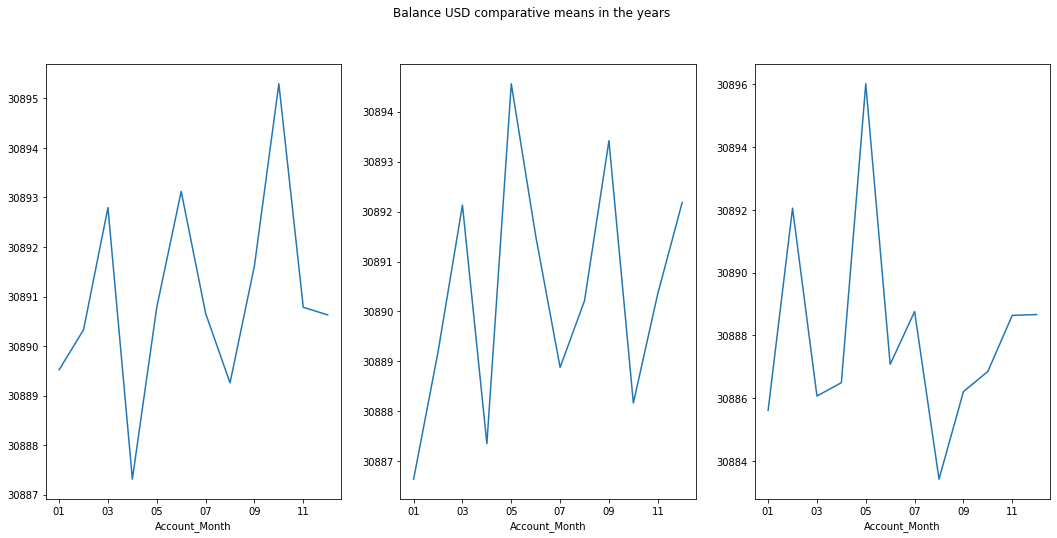

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
fig.suptitle('Balance USD comparative means in the years')
grouped_2018 = data_2018.groupby("Account_Month")
agg_2018 = grouped_2018['Balance_USD'].agg(np.mean)
agg_2018.plot(ax=axs[0])
grouped_2019 = data_2019.groupby("Account_Month")
agg_2019 = grouped_2019['Balance_USD'].agg(np.mean)
agg_2019.plot(ax=axs[1])
grouped_2020 = data_2020.groupby("Account_Month")
agg_2020 = grouped_2020['Balance_USD'].agg(np.mean)
agg_2020.plot(ax=axs[2])

*Search codes for Country and take the business unit that Division*

Note: I realized that several divisions share the same business unit, and this could mean something. That's why I wanted to add the column for evaluation.

In [24]:
def search_codes(df,reference_table, country_table_codes):
    reference_table = reference_table.drop(["Unnamed: 0"], axis = 1)
    join = pd.merge(pd.merge(left = df, right = reference_table, on = "Division"),right = country_table_codes, on = "Country_Num")
    return join
data_2018 = search_codes(data_2018,reference_table,country_table_codes)
data_2019 = search_codes(data_2019,reference_table,country_table_codes)
data_2020 = search_codes(data_2020,reference_table,country_table_codes)

In [25]:
data_2018.head(2)

,Country_Num,Division,Balance_USD,Account_Month,Account_Year,Business Unit,Code
0,218,B4,37203.882582,01,2018,Global Technology Services,ECU
1,218,B4,30359.764702,01,2018,Global Technology Services,ECU


*Drop redundant column in the dataframes*

In [26]:
data_2018 = data_2018.drop(["Code"], axis=1)
data_2019 = data_2019.drop(["Code"], axis=1)
data_2020 = data_2020.drop(["Code"], axis=1)

**Data distribution**

*Plotting bar plots for categorical data columns*

Note: Visually representing the distribution of the data helps tell a better story for different stakeholders in case they want to go into more detail.

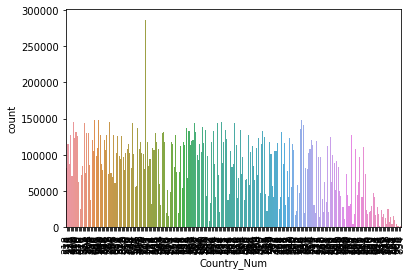

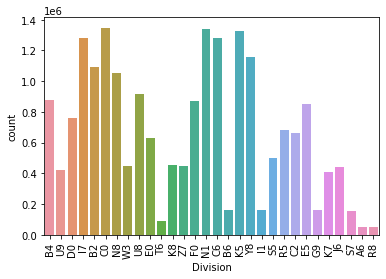

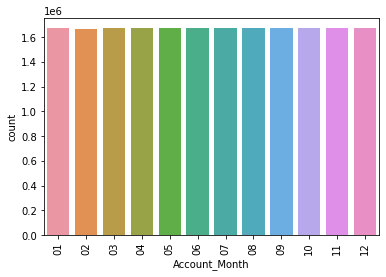

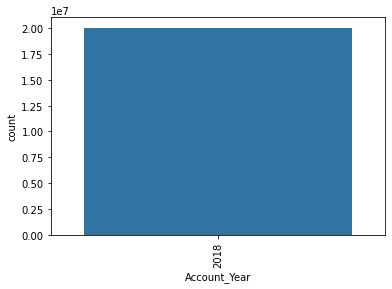

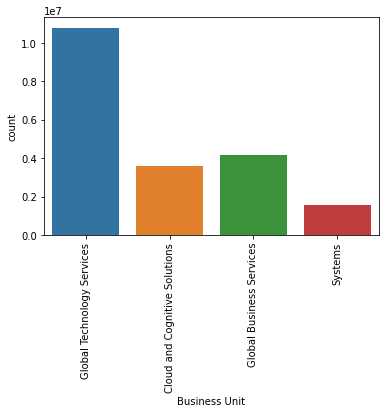

In [27]:
df_cat = data_2018.select_dtypes(include =['object'])
for col in df_cat.columns:
    plt.figure()
    sns.countplot(x=col, data=df_cat)
    plt.xticks(rotation=90)

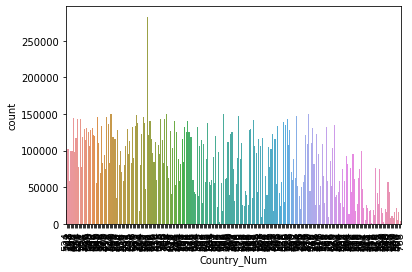

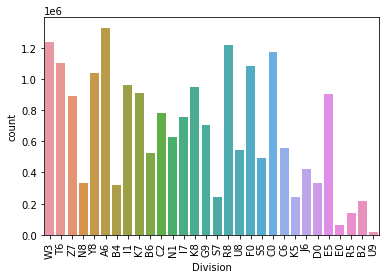

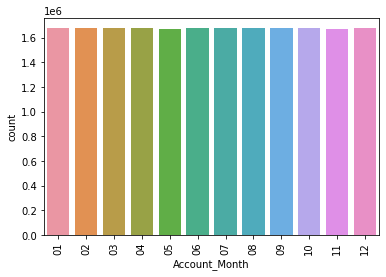

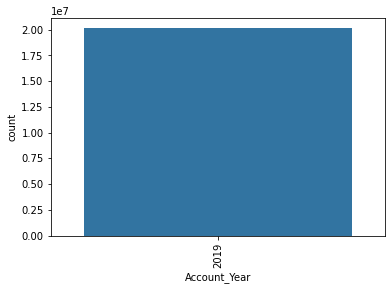

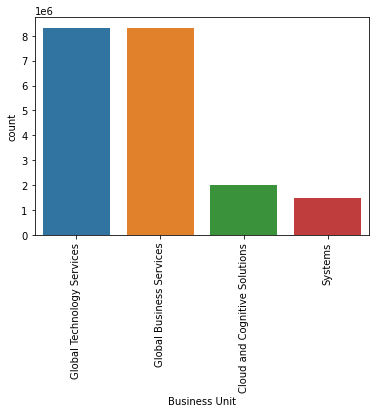

In [28]:
df_cat = data_2019.select_dtypes(include =['object'])
for col in df_cat.columns:
    plt.figure()
    sns.countplot(x=col, data=df_cat)
    plt.xticks(rotation=90)

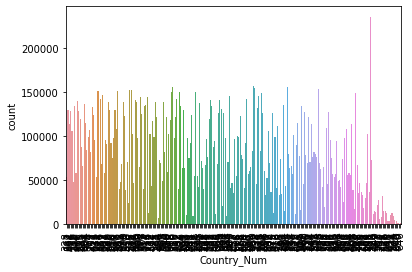

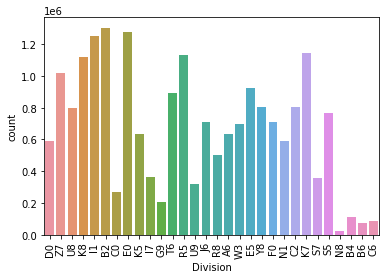

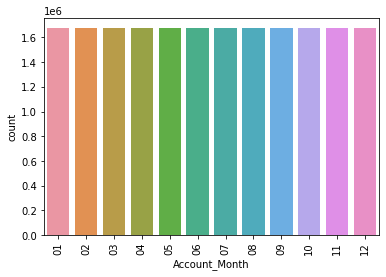

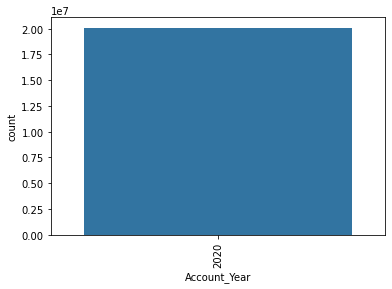

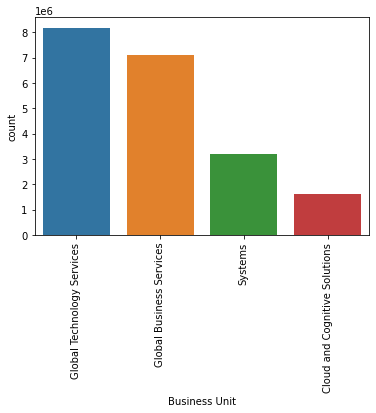

In [29]:
df_cat = data_2020.select_dtypes(include =['object'])
for col in df_cat.columns:
    plt.figure()
    sns.countplot(x=col, data=df_cat)
    plt.xticks(rotation=90)

Note: As we see in the graphs, the number of countries is large. How many do we have in total?

In [30]:
len(data_2018.Country_Num.unique())

249

*BoxPlot with data for year*

Note: In a visual way, I also decided to graph the behavior of the Balance_USD with respect to the other variables by year. In such a way that when seeing its distribution, I can realize that the number of outliers occurs in all years with a greater presence with respect to the country and the month of the year.

<AxesSubplot:xlabel='Division', ylabel='Balance_USD'>

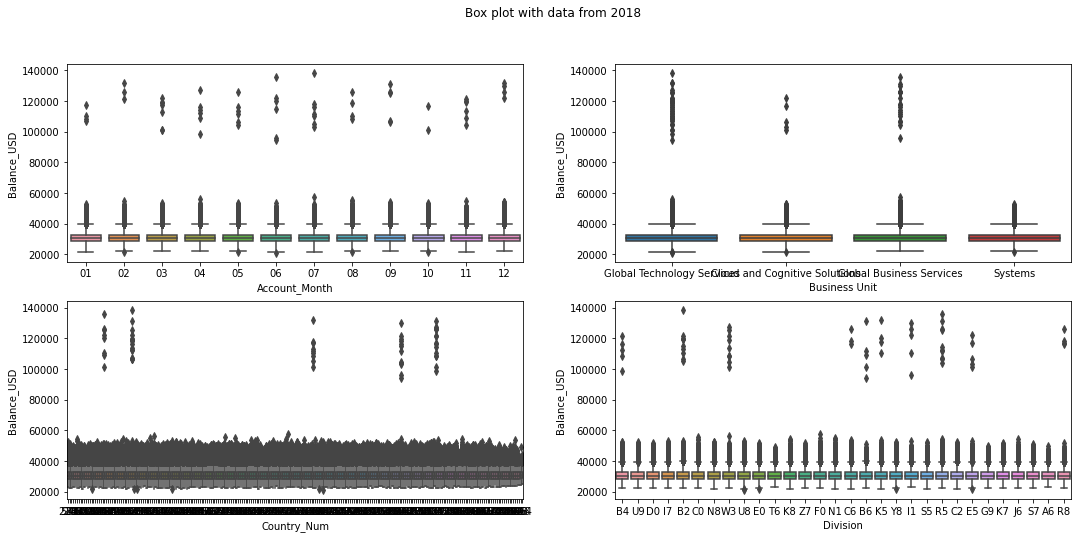

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,8))
fig.suptitle('Box plot with data from 2018')
sns.boxplot(data=data_2018, x="Account_Month",y='Balance_USD', ax=axs[0,0])
sns.boxplot(data=data_2018, x='Business Unit',y='Balance_USD',ax=axs[0,1] )
sns.boxplot(data=data_2018, x='Country_Num',y='Balance_USD',ax=axs[1,0] )
sns.boxplot(data=data_2018, x='Division',y='Balance_USD',ax=axs[1,1] )

<AxesSubplot:xlabel='Division', ylabel='Balance_USD'>

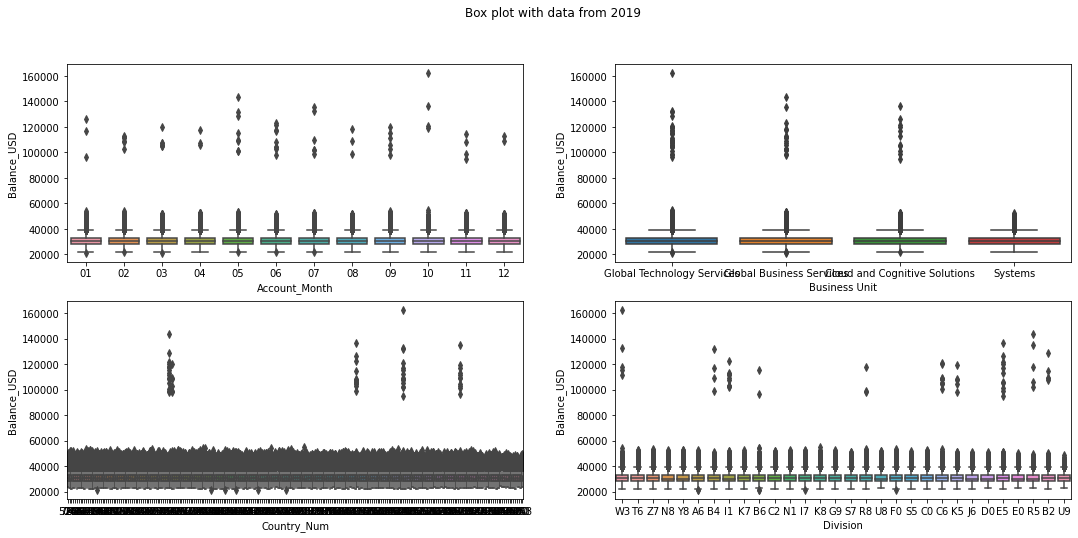

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,8))
fig.suptitle('Box plot with data from 2019')
sns.boxplot(data=data_2019, x="Account_Month",y='Balance_USD', ax=axs[0,0])
sns.boxplot(data=data_2019, x='Business Unit',y='Balance_USD',ax=axs[0,1] )
sns.boxplot(data=data_2019, x='Country_Num',y='Balance_USD',ax=axs[1,0] )
sns.boxplot(data=data_2019, x='Division',y='Balance_USD',ax=axs[1,1] )

<AxesSubplot:xlabel='Division', ylabel='Balance_USD'>

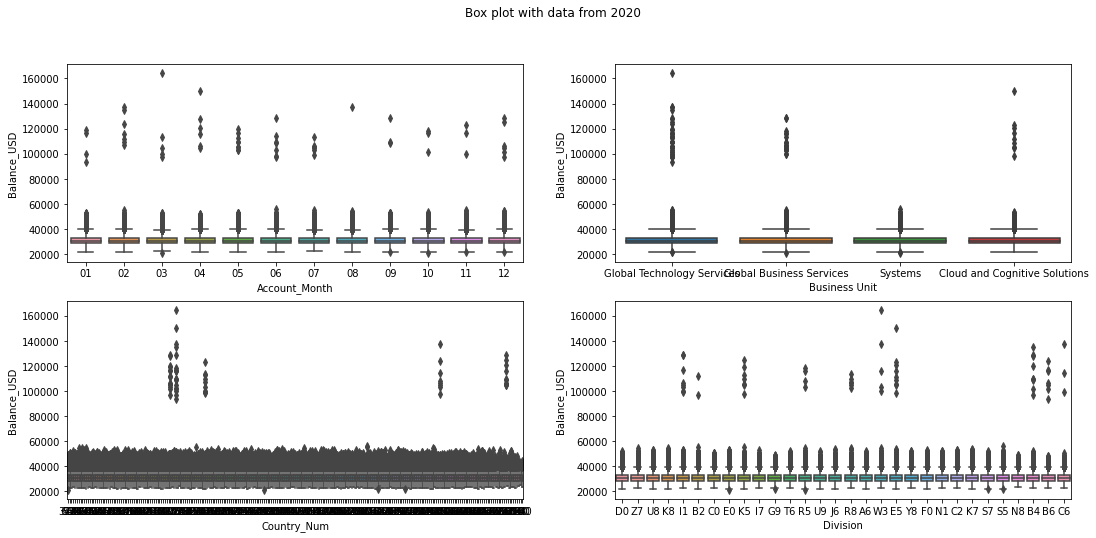

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,8))
fig.suptitle('Box plot with data from 2020')
sns.boxplot(data=data_2020, x="Account_Month",y='Balance_USD', ax=axs[0,0])
sns.boxplot(data=data_2020, x='Business Unit',y='Balance_USD',ax=axs[0,1] )
sns.boxplot(data=data_2020, x='Country_Num',y='Balance_USD',ax=axs[1,0] )
sns.boxplot(data=data_2020, x='Division',y='Balance_USD',ax=axs[1,1] )

**Correlation in data**

<AxesSubplot:xlabel='Business Unit', ylabel='Account_Month'>

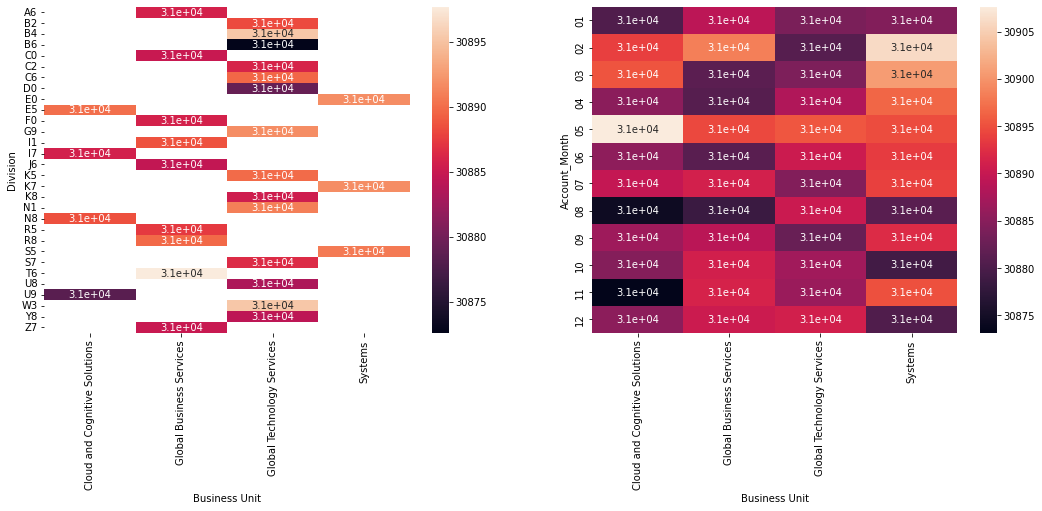

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
df_heatmap_1 = data_2020.pivot_table(values='Balance_USD',index='Division',columns='Business Unit',aggfunc=np.mean)
sns.heatmap(df_heatmap_1,annot=True,ax=axs[0])
df_heatmap = data_2020.pivot_table(values='Balance_USD',index="Account_Month",columns='Business Unit',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,ax=axs[1])

<AxesSubplot:xlabel='Account_Month', ylabel='Country_Num'>

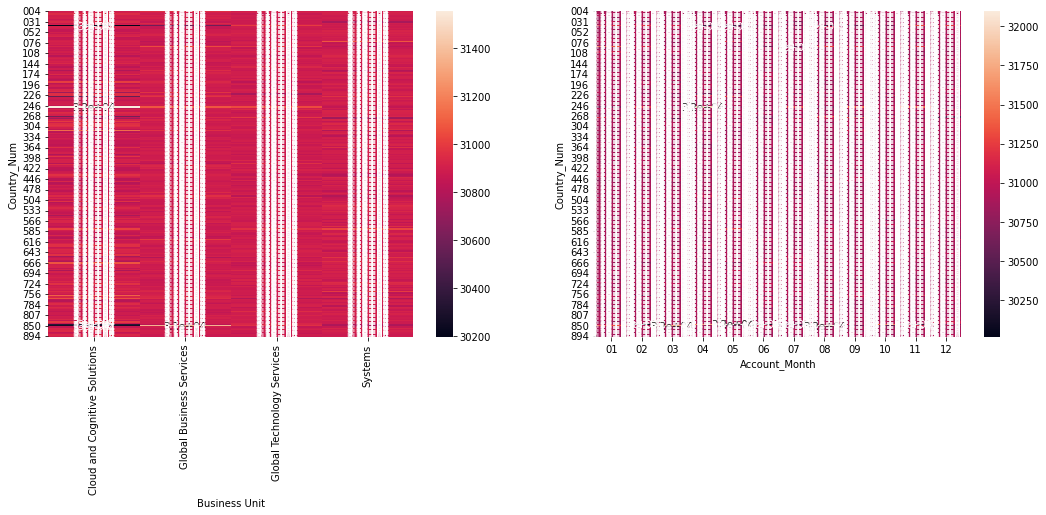

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
df_heatmap_1 = data_2020.pivot_table(values='Balance_USD',index="Country_Num",columns='Business Unit',aggfunc=np.mean)
sns.heatmap(df_heatmap_1,annot=True,ax=axs[0])
df_heatmap = data_2020.pivot_table(values='Balance_USD',index="Country_Num",columns="Account_Month",aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,ax=axs[1])

**Chi-square test.**

The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related). It is a nonparametric test.



In [36]:
from scipy.stats import chi2_contingency

Note:

*$H_{0}$ = variable_1 and variable_2 are independent.*

*$H_{A}$ = variable_1 and variable_2 are not independent.*

*The significance level $alpha$ = .05.*

P-value is the probability of $H_{0}$ being True, 

If P-value > 0.05 then only we accept the assumption($H_{0}$)

In [37]:
def chi2_test(df):
    CrosstabResult=pd.crosstab(index=df["Country_Num"],columns=df['Business Unit'])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test -Country_Num with Business Unit- is:', ChiSqResult[1])
    CrosstabResult=pd.crosstab(index=df["Country_Num"],columns=df["Division"])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test -Country_Num with Division- is:', ChiSqResult[1])
    CrosstabResult=pd.crosstab(index=df["Account_Month"],columns=df["Division"])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test -Account_Month with Division- is:', ChiSqResult[1])
    CrosstabResult=pd.crosstab(index=df["Account_Month"],columns=df["Country_Num"])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test -Account_Month with Country_Num- is:', ChiSqResult[1])
    CrosstabResult=pd.crosstab(index=df["Account_Month"],columns=df['Business Unit'])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test -Account_Month with Business Unit-  is:', ChiSqResult[1])
    CrosstabResult=pd.crosstab(index=df["Division"],columns=df['Business Unit'])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test -Division with Business Unit- is:', ChiSqResult[1])
    return ChiSqResult[1]

chi2_test(data_2018)

The P-Value of the ChiSq Test -Country_Num with Business Unit- is: 0.9868468499711671
The P-Value of the ChiSq Test -Country_Num with Division- is: 0.6923543363488234
The P-Value of the ChiSq Test -Account_Month with Division- is: 0.2425077944594783
The P-Value of the ChiSq Test -Account_Month with Country_Num- is: 0.27057327921612917
The P-Value of the ChiSq Test -Account_Month with Business Unit-  is: 0.07326196375228157
The P-Value of the ChiSq Test -Division with Business Unit- is: 0.0


0.0

In [38]:
chi2_test(data_2019)

The P-Value of the ChiSq Test -Country_Num with Business Unit- is: 0.002892390142493278
The P-Value of the ChiSq Test -Country_Num with Division- is: 0.2855902563363279
The P-Value of the ChiSq Test -Account_Month with Division- is: 0.7258947236630993
The P-Value of the ChiSq Test -Account_Month with Country_Num- is: 0.8073530403787272
The P-Value of the ChiSq Test -Account_Month with Business Unit-  is: 0.5522201419300229
The P-Value of the ChiSq Test -Division with Business Unit- is: 0.0


0.0

Note:

The P-Value of the ChiSq Test -Country_Num with Business Unit- is: 0.002892.

We accept the assumption $H_{A}$, Country_Num and Business Unit *are not independent*.

In [39]:
chi2_test(data_2020)

The P-Value of the ChiSq Test -Country_Num with Business Unit- is: 0.9395289894961361
The P-Value of the ChiSq Test -Country_Num with Division- is: 0.9759277762320285
The P-Value of the ChiSq Test -Account_Month with Division- is: 0.16337237184007447
The P-Value of the ChiSq Test -Account_Month with Country_Num- is: 0.5124232115501501
The P-Value of the ChiSq Test -Account_Month with Business Unit-  is: 0.9019029702605431
The P-Value of the ChiSq Test -Division with Business Unit- is: 0.0


0.0

**Pre-processing Data**

*Concat all dataframes (previusly cleaning):*

In [40]:
df_concat = pd.concat([data_2018, data_2019, data_2020], ignore_index=True)

*For futures models I considerete use Vaex or Dask, this because the memory usage is high with pandas for df large*

In [41]:
df_concat.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60272313 entries, 0 to 60272312
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Country_Num    object 
 1   Division       object 
 2   Balance_USD    float64
 3   Account_Month  object 
 4   Account_Year   object 
 5   Business Unit  object 
dtypes: float64(1), object(5)
memory usage: 18.4 GB


The amount of data is very large, for this reason I have decided to use the sample() method which allows to randomly select a sample of the total data. In this case I have decided to work with 70% of them.

In [42]:
df_sample = df_concat.sample(frac=0.6, random_state=1)

## Isolation Forest

One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The Isolation Forest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

I frequently use scikit-learn for ML models, however, given the amount of data and the well-described H2o documentation, it convinced me to test this model in this library.

*Import libraries*

In [43]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.351-b10, mixed mode)
  Starting server from C:\Users\AndreaArredondoRodri\anaconda3\envs\IBM\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ANDREA~1\AppData\Local\Temp\tmpna4cy4id
  JVM stdout: C:\Users\ANDREA~1\AppData\Local\Temp\tmpna4cy4id\h2o_003465781_started_from_python.out
  JVM stderr: C:\Users\ANDREA~1\AppData\Local\Temp\tmpna4cy4id\h2o_003465781_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Mexico_City
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_003465781_kczuzh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.488 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [44]:
from h2o.estimators import H2OIsolationForestEstimator

*Define the correct type of object for use H2o, Change the dataframe to H2oFrame:*

In [45]:
hf = h2o.H2OFrame(df_sample)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Define variables that I used for the algorithm, in this case I decide use this columns, first because previusly I see the data distribution, and second, because Isolation Forest is a unsupervised algorithm.

In [46]:
X=['Country_Num','Division','Balance_USD','Account_Year','Business Unit',"Account_Month"]

**Modeling**

Define the isoforest:

In [47]:
isolation_model = H2OIsolationForestEstimator(model_id = "isolation_forest.hex", sample_rate = 0.1,max_depth = 20,ntrees = 50)
isolation_model.train(training_frame = hf, x = X)


isolationforest Model Build progress: |██████████████████████████████████████████| (done) 100%


Model Details
=============
H2OIsolationForestEstimator : Isolation Forest
Model Key: isolation_forest.hex


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          4.44085e+07            20           20           20            36032         113509        70860.4

ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 15.643180045026165
Normalized Anomaly Score: 0.269928304685093

Scoring History: 
     timestamp            duration           number_of_trees    mean_tree_path_length    mean_anomaly_score
---  -------------------  -----------------  -----------------  -----------------------  --------------------
     2023-02-06 03:36:39  0.057 sec          0.0                nan                      nan
     2023-02-06 03:37:00  21.513 sec         1.0                17.644858619980333       0.07971419882468153
     2023-02-06 03:37:20  41.432 sec         2.0                16.0455822796796         0.1790556194133356
     2023-02-06 03:37:40  1 min  1.378 sec   3.0                15.654525473385474       0.20909215791340802
     2023-02-06 03:37:59  1 min 20.546 sec   4.0                15.96471228767329        0.2168062651661942
     2023-02-06 03:38:20  1 min 41.882 sec   5.0                15.938296690947212       0.2251252433127241
     2023-02-06 03:38:41  2 min  2.221 sec   6.0                15.615968449815266       0.26031011924498004
     2023-02-06 03:38:59  2 min 20.771 sec   7.0                15.620729658702583       0.26578530774251974
     2023-02-06 03:39:19  2 min 40.605 sec   8.0                15.56485304960543        0.27481175603157226
     2023-02-06 03:39:39  3 min  0.247 sec   9.0                15.505305263078561       0.28335362731795183
---  ---                  ---                ---                ---                      ---
     2023-02-06 03:49:58  13 min 19.403 sec  41.0               15.783658854593416       0.26514871158277775
     2023-02-06 03:50:19  13 min 40.951 sec  42.0               15.77935426859168        0.26878891072533384
     2023-02-06 03:50:42  14 min  3.165 sec  43.0               15.77180825913508        0.26890120277526025
     2023-02-06 03:51:02  14 min 23.943 sec  44.0               15.754897594555892       0.26705839881006677
     2023-02-06 03:51:20  14 min 41.330 sec  45.0               15.655215624293954       0.2764291861423857
     2023-02-06 03:51:40  15 min  1.430 sec  46.0               15.687665036647493       0.27402309375347034
     2023-02-06 03:52:00  15 min 21.601 sec  47.0               15.705617254615435       0.27079762089012666
     2023-02-06 03:52:18  15 min 39.591 sec  48.0               15.60758922437934        0.27991500427982985
     2023-02-06 03:52:38  15 min 59.296 sec  49.0               15.62149257595321        0.27272993165712706
     2023-02-06 03:52:56  16 min 17.199 sec  50.0               15.643180045026165       0.269928304685093
[51 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

mean_length: is the average number of splits it took to isolate the record across all the decision trees in the forest. 

In [48]:
predictions = isolation_model.predict(hf)
predictions.head()

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.262868,15.72
0.226103,16.12
0.329044,15
0.264706,15.7
0.0827206,17.68
0.441176,13.78
0.297794,15.34
0.220588,16.18
0.196691,16.44
0.216912,16.22


Note: Records with a smaller mean_length are more likely to be anomalous since it takes fewer partitions of the data to isolate them.

*Let's see the distribution of mean_length:*

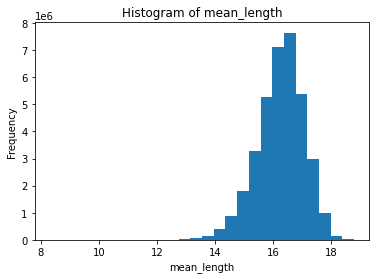

breaks,counts,mids_true,mids,widths
8.10296,nan,nan,nan,nan
8.50593,4,3.85,8.30444,0.402963
8.90889,5,4.19,8.70741,0.402963
9.31185,11,4.29,9.11037,0.402963
9.71481,21,4.48,9.51333,0.402963
10.1178,41,4.66,9.9163,0.402963
10.5207,73,4.86,10.3193,0.402963
10.9237,174,5.06,10.7222,0.402963
11.3267,426,5.27,11.1252,0.402963
11.7296,980,5.47,11.5281,0.402963


In [49]:
predictions["mean_length"].hist()

The distribution of the mean_length shows that the anomalies are not only found on one side, but that extreme values can be seen on both ends.

We define an hframe with the cases that comply with this:


In [63]:
anomalies = hf[predictions["mean_length"] < 13 or predictions["mean_length"] > 18.5]
print("Number of Anomalies: " + str(anomalies.nrow))

Number of Anomalies: 95761


In [64]:
isolation_model.predict(anomalies)["mean_length"].cbind(anomalies[X])

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


mean_length,Country_Num,Division,Balance_USD,Account_Year,Business Unit,Account_Month
12.92,108,C0,26593.9,2019,Global Business Services,1
12.74,12,C0,31549.7,2019,Global Business Services,7
12.66,4,A6,27679.1,2019,Global Business Services,9
12.94,634,Y8,39461.7,2019,Global Technology Services,11
12.92,674,E0,44795.9,2018,Systems,4
12.2,16,A6,35377.6,2019,Global Business Services,11
12.92,694,F0,40089,2019,Global Business Services,12
12.7,894,N8,25002.5,2019,Cloud and Cognitive Solutions,10
12.5,24,S5,42475.8,2020,Systems,12
12.56,74,Y8,38157.9,2019,Global Technology Services,9


*Number of anomalies acording the model:*

In [73]:
global_surrogate_data = hf[:, :]
global_surrogate_data["anomaly"] = (predictions["mean_length"] < 13 or predictions["mean_length"] > 18.5).ifelse("Yes", "No")
global_surrogate_data["anomaly"].table()

anomaly,Count
No,3.60676e+07
Yes,95761


Using a threshold, for have a idea about the relative number of outliers in our dataset, we can find the corresponding quantile value of the score.

In [74]:
quantile = 0.95
quantile_frame = predictions.quantile([quantile])
quantile_frame

Probs,predictQuantiles,mean_lengthQuantiles,predicted_classQuantiles
0.95,0.398897,16.86,0


We can use the threshold to predict the anomalous class.

In [75]:
threshold = quantile_frame[0, "predictQuantiles"]
predictions["predicted_class"] = predictions["predict"] > threshold
predictions

predict,mean_length,predicted_class
0.262868,15.72,0
0.226103,16.12,0
0.329044,15,0
0.264706,15.7,0
0.0827206,17.68,0
0.441176,13.78,1
0.297794,15.34,0
0.220588,16.18,0
0.196691,16.44,0
0.216912,16.22,0


What do the anomalies look like?

In [77]:
anomalies[0, X]

Country_Num,Division,Balance_USD,Account_Year,Business Unit,Account_Month
108,C0,26593.9,2019,Global Business Services,1


In [78]:
isolation_model.predict(anomalies[0, :])

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.520221,12.92


In [ ]:
from h2o.estimators import H2ORandomForestEstimator

global_surrogate_dt = H2ORandomForestEstimator(model_id = "global_surrogate_decision_tree.hex", 
                                               ntrees = 1, max_depth = 3,
                                               sample_rate = 1, mtries = len(X))
global_surrogate_dt.train(training_frame = global_surrogate_data, x = X, y = "anomaly")

C:\Users\AndreaArredondoRodri\anaconda3\envs\IBM\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Sample rate is 100% and no validation dataset and no cross-validation. There are no out-of-bag data to compute error estimates on the training data!
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |████

**Isolation Forests in scikit-learn**

In [57]:
from sklearn.ensemble import IsolationForest

*Train Isolation Forest*

In [ ]:
model  =  IsolationForest(n_estimators=50, max_samples=20, contamination=.01, max_features=2, 
                         bootstrap=False, n_jobs=1, random_state=1).fit(df_sample[["Account_Month","Balance_USD"]])


*Get Anomaly Scores and Predictions*

In [ ]:
anomaly_score = model.decision_function(df_sample)
predictions = model.predict(df_sample)

*Visualize Anomaly scores and Anomaly Status*

In [ ]:
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(df_sample['Balance_USD'], df_sample["Country_Num"], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Balance_USD', fontsize = 16)
plt.ylabel("Country_Num", fontsize = 16)
plt.grid()

*To Plot Predictions*

In [ ]:
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(df_sample['Balance_USD'], df_sample["Country_Num"], c = predictions, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Balance_USD', fontsize = 16)
plt.ylabel("Country_Num", fontsize = 16)
plt.grid()
plt.title('Contamination = 0.01', weight = 'bold')

In [ ]:
#print("Accuracy percentage:", 100*list(df_train_pandas['anomaly']).count(-1)/(outliers_counter))

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0152173
https://medium.com/@shreyash0023/anomaly-detection-on-a-categorical-and-continuous-dataset-d5af7aa287d2

https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/